converted to python 3

equation for latent heat of vaporization from Rogers and Yau (J/g)
$$ 2500.8 - 2.36T + 0.0016T^2 - 0.00006T^3$$
where $T$ is in Centrigrade

equation for latent heat of sublimation (vapor to ice) from Rogers and Yau (J/g)
$$2834.1 - 0.29T - 0.004T^2$$

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# convert 1 W/m2 to a global integral
TE = 1.*np.pi*6.36e6**2
print ("TE", TE)
# petawatt is 1.e15 W
# terawatt is 1.e12 W
print ("TE in TW is ", TE*1.e-12)

TE 127076166200645.7
TE in TW is  127.0761662006457


In [14]:
# correction term for heat capacity of moist air
cpv = 1870.
cpd = 1006.
cterm1 = cpv/cpd - 1.
# assume water vapor mixing ratio is 0.04
cterm2 = 1+0.04*cterm1
cpm = cpd*cterm2
print ("cterm1, cterm2, cpd, cpm", cterm1, cterm2, cpd, cpm)
latvap = 2500.8e3
tdd = latvap*0.04/cpd
tdm = latvap*0.04/cpm
tdiff = tdd-tdm
print ("if all water condensed out", tdiff)
print ("alternate estimate")

cterm1, cterm2, cpd, cpm 0.8588469184890657 1.0343538767395626 1006.0 1040.56
if all water condensed out 3.302536132478579
alternate estimate


In [15]:
# diff between mixing ratio and spec humidity
qv = 0.04
rv = qv/(1.-qv)
print ("qv, rv", qv, rv)
latvap = 2500.8e3
cpd = 1006.
tdiff = latvap*(rv-qv)/cpd
print ("tdiff", tdiff)

qv, rv 0.04 0.04166666666666667
tdiff 4.14314115308152


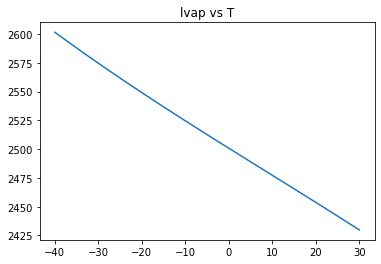

In [16]:
T = np.linspace(-40, 30, 100)
lvap = 2500.8 - 2.36*T + 0.0016*T**2 - 0.00006*T**3
plt.plot(T, lvap)
plt.title('lvap vs T');

In [ ]:
T = np.linspace(-90, 10, 100)
latfus = 2834.1-0.29*T-0.004*T**2
plt.plot(T, latfus)
plt.title('lat sublimation vs T');

$$
evap = rain+snow
$$
so
$$
\begin{align}
Latent\ Heat\ Flux & = (L_f+L_v)evap - L_f rain \\
 & = (L_f+L_v)(rain + snow)-L_f rain \\
 & = (L_f+L_v)rain + (L_f+L_v)snow - L_f rain \\
 & = (L_v) rain + L_f snow + L_v snow \\
 & = (L_v)(rain+snow) + L_f snow \\
 & = L_v evap + l_f snow
\end{align} \tag{3}
$$

In [17]:
molwth2o = 18.01528 # g/mol from wikipedia
cpv100 = 36.5 # J/mol/K at 100C
cpv100s = cpv100/molwth2o*1000. # convert to J/kg/K
print ("heat capacity at 100C", cpv100s)
4.218-2.106

heat capacity at 100C 2026.0578797554074


2.112

\begin{align*} 
C_p{\partial T \over \partial t} \cdot {\delta p \over g} =& F \\
\end{align*}
or
\begin{align*}
{\partial T \over \partial t} = & F \cdot {g \over C_p \delta p}\\
\end{align*} 
notes on units:
* W/m2 is J/s/m2
* C_p air is about 1.e3 J/kg/K
* g is 9.8 m/s2
* Pa is kg/m/s2

So
g/delta p = 1./(rho delta z) = m2/kg


In [18]:
# if F is 44 W/m2
dtdt = 44/1000./8.e4*9.8
print ("dtdt in K/day", dtdt*86400.)

dtdt in K/day 0.46569599999999994


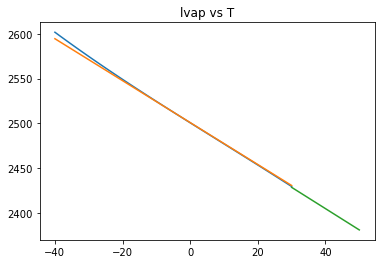

In [19]:
# using Kirchhoffs equation, 
cpv = 1884.4
cl = 4219.
t0 = 273.16
lvap0 = 2.501e6
T = np.linspace(-40, 30, 100)
TK = T + t0
lvap = 2500.8 - 2.36*T + 0.0016*T**2 - 0.00006*T**3
lvap2 = ((cpv-cl)*(TK-t0)+lvap0)/1000.
plt.plot(T, lvap)
plt.plot(T, lvap2)
T2 = np.linspace(30, 50, 20)
latvap3 = 2.5e3 - 2.37*(T2)
plt.plot(T2,latvap3)
plt.title('lvap vs T');
plt.savefig("lvap.pdf",type="pdf")

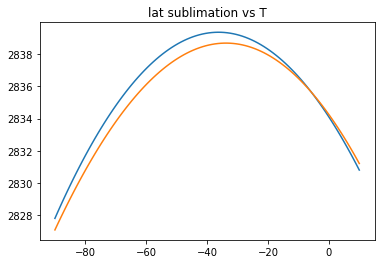

In [21]:
T = np.linspace(-90, 10, 100)
# latent heat of sub from Rogers and Yau
latsub = 2834.1-0.29*T-0.004*T**2
TK = T + t0
# from murphy and koop
mwt = 18.015 # g /mol
xponent = -((TK/123.75)**2)
#print "xponent", xponent
latsub2 = (46782.5 + 35.8925*TK - 0.07414*TK**2 + 
           541.5*np.exp(xponent)
          )/mwt
plt.plot(T, latsub)
plt.plot(T, latsub2)
plt.title('lat sublimation vs T');
plt.savefig("lsub.pdf",type="pdf")

4.2 2.05 330.0


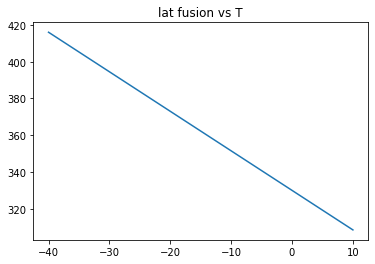

In [22]:
T = np.linspace(-40, 10, 100)
# latent heat of sub from Rogers and Yau
TK = T + t0
cpl = 4.2 # J/g/K
cpi = 2.050 # J/g/K
latf0 = 3.3e2 # J/g/
#print "TK", TK
print (cpl, cpi, latf0)
latf = latf0 - (cpl - cpi)*(TK-t0)
plt.plot(T, latf)
plt.title('lat fusion vs T');
plt.savefig("lfus.pdf",type="pdf")